In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
data = pd.read_csv('Data_Washington/listings.csv')

In [64]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20230618033258,2023-06-18,city scrape,Home in Washington · ★4.63 · 1 bedroom · 1 bed...,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,...,4.84,3.88,4.63,NaN,f,1,0,1,0,0.53
1,3943,https://www.airbnb.com/rooms/3943,20230618033258,2023-06-18,city scrape,Townhouse in Washington · ★4.83 · 1 bedroom · ...,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/airflow/Hosti...,5059,...,4.91,4.57,4.75,NaN,f,5,0,5,0,2.75
2,883653,https://www.airbnb.com/rooms/883653,20230618033258,2023-06-18,previous scrape,"Townhouse in Washington, D.C. · ★4.91 · 4 bedr...",Gorgeous LEED Platinum house with an open floo...,Mt Pleasant is one of the most beloved neighbo...,https://a0.muscache.com/pictures/14971825/1b36...,1541121,...,4.97,4.91,4.66,Unhosted License: 5007262201000253,f,1,1,0,0,0.28
3,153545,https://www.airbnb.com/rooms/153545,20230618033258,2023-06-18,city scrape,Home in Washington · ★4.63 · 1 bedroom · 1 bed...,"A large, private bedroom. Upscale, safe, and...","It is one of the safest, peaceful, and the mos...",https://a0.muscache.com/pictures/1843270/67cb3...,738459,...,4.85,4.59,4.62,NaN,f,5,3,2,0,0.27
4,4197,https://www.airbnb.com/rooms/4197,20230618033258,2023-06-18,city scrape,Home in Washington · ★4.84 · 1 bedroom · 1 bed...,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",https://a0.muscache.com/pictures/miso/Hosting-...,5061,...,4.98,4.96,4.94,NaN,f,2,0,2,0,0.31


In [65]:
print(f'Shape of data: {data.shape}')

Shape of data: (6541, 75)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6541 non-null   int64  
 1   listing_url                                   6541 non-null   object 
 2   scrape_id                                     6541 non-null   int64  
 3   last_scraped                                  6541 non-null   object 
 4   source                                        6541 non-null   object 
 5   name                                          6541 non-null   object 
 6   description                                   6502 non-null   object 
 7   neighborhood_overview                         4555 non-null   object 
 8   picture_url                                   6541 non-null   object 
 9   host_id                                       6541 non-null   i

In [67]:
data.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview',
           'picture_url', 'host_id', 'host_url', 'host_name',  'host_since', 'host_location', 'host_about',
           'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications',
           'host_has_profile_pic'], axis=1, inplace=True)

In [68]:
data.isna().sum(axis=0)

id                                                 0
host_response_time                              1221
host_response_rate                              1221
host_acceptance_rate                            1160
host_is_superhost                               1380
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
neighbourhood                                   1986
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    6541
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                       6541
bathrooms_text                                     4
bedrooms                                      

In [69]:
data.drop(['host_response_time', 'host_response_rate','host_acceptance_rate', 'host_is_superhost',
           'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated',
           'license', 'calendar_last_scraped','first_review', 'last_review', 'latitude', 'longitude', 'reviews_per_month'], axis=1, inplace=True)

In [70]:
data.drop(['minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'review_scores_location'], axis=1, inplace=True)


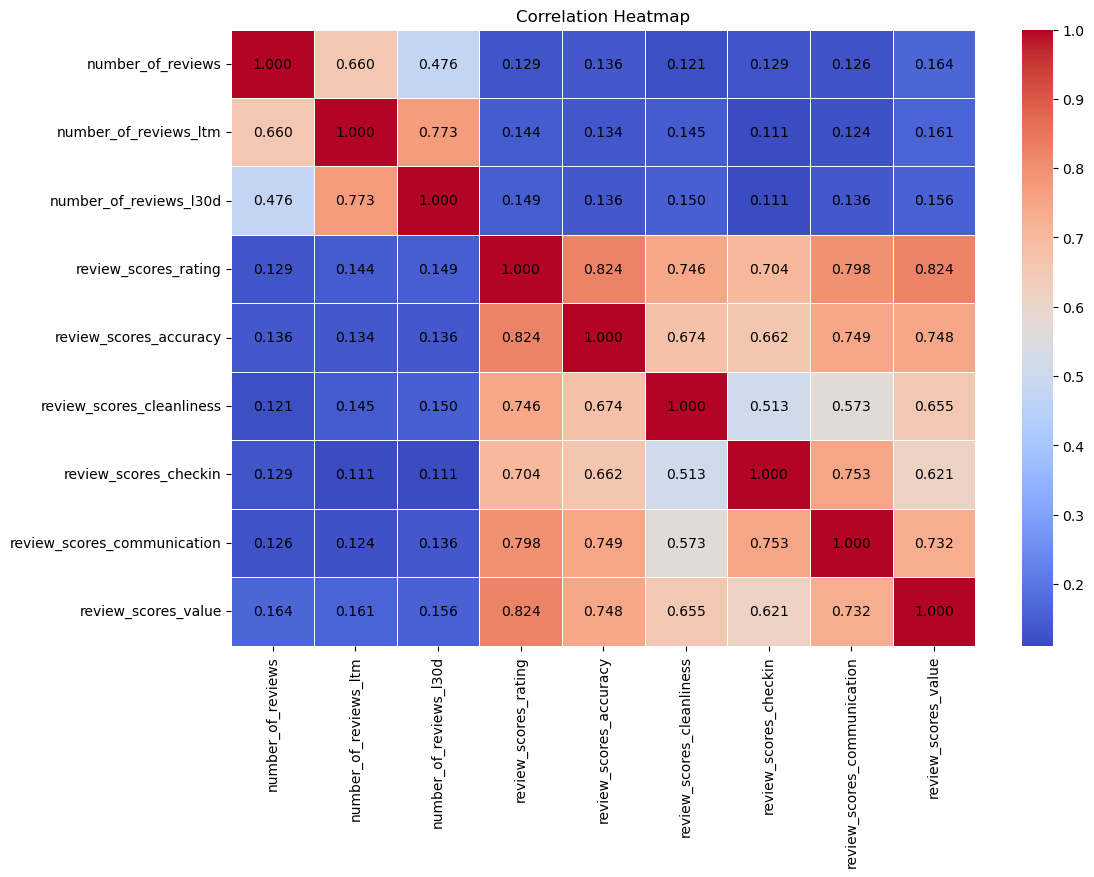

In [71]:
corr = data[['number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_value']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.3f}",
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Heatmap')
plt.show()


'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_value' are high correlated with 'review_scores_rating'

In [72]:
data.drop(['review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_value'], axis=1, inplace=True)

In [73]:
data.isna().sum(axis=0)

id                                                 0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms_text                                     4
bedrooms                                        1742
beds                                              63
amenities                                          0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
has_availability                                   0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                              

In [74]:
data.head()

,id,host_listings_count,host_total_listings_count,host_identity_verified,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,...,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3686,1,4,t,Private room in home,Private room,1,1 private bath,NaN,1.0,...,277,82,3,0,4.63,f,1,0,1,0
1,3943,5,5,t,Private room in townhouse,Private room,2,1 private bath,NaN,1.0,...,301,472,31,2,4.83,f,5,0,5,0
2,883653,2,2,t,Entire townhouse,Entire home/apt,7,3.5 baths,4.0,5.0,...,2,35,2,0,4.91,f,1,1,0,0
3,153545,6,6,t,Private room in home,Private room,1,2 shared baths,NaN,1.0,...,311,38,1,0,4.63,f,5,3,2,0
4,4197,2,2,t,Private room in home,Private room,1,1.5 shared baths,NaN,1.0,...,320,53,8,1,4.84,f,2,0,2,0


calculated_host_listings_count = calculated_host_listings_count_entire_homes + calculated_host_listings_count_private_rooms + calculated_host_listings_count_shared_rooms

In [75]:
data.drop(['calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1, inplace=True)

In [76]:
data['bathrooms_text'].value_counts()

bathrooms_text
1 bath              3538
2 baths              696
1 private bath       420
1 shared bath        408
1.5 baths            343
2.5 baths            340
0 shared baths       165
3.5 baths            144
3 baths              128
1.5 shared baths     109
2 shared baths        90
2.5 shared baths      42
4 baths               41
4.5 baths             21
3 shared baths        15
5 baths               12
4.5 shared baths       9
5.5 baths              4
0 baths                3
6 baths                2
5.5 shared baths       2
Half-bath              1
5 shared baths         1
8 shared baths         1
7 baths                1
15 baths               1
Name: count, dtype: int64

In [77]:
data.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)

In [78]:
data['bathrooms'] = data['bathrooms'].str.extract('(\d+\.?\d*)').astype(float)

In [79]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')

In [80]:
data['price'] = data['price'].astype(float)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6541 non-null   int64  
 1   host_listings_count             6541 non-null   int64  
 2   host_total_listings_count       6541 non-null   int64  
 3   host_identity_verified          6541 non-null   object 
 4   property_type                   6541 non-null   object 
 5   room_type                       6541 non-null   object 
 6   accommodates                    6541 non-null   int64  
 7   bathrooms                       6536 non-null   float64
 8   bedrooms                        4799 non-null   float64
 9   beds                            6478 non-null   float64
 10  amenities                       6541 non-null   object 
 11  price                           6541 non-null   float64
 12  minimum_nights                  65

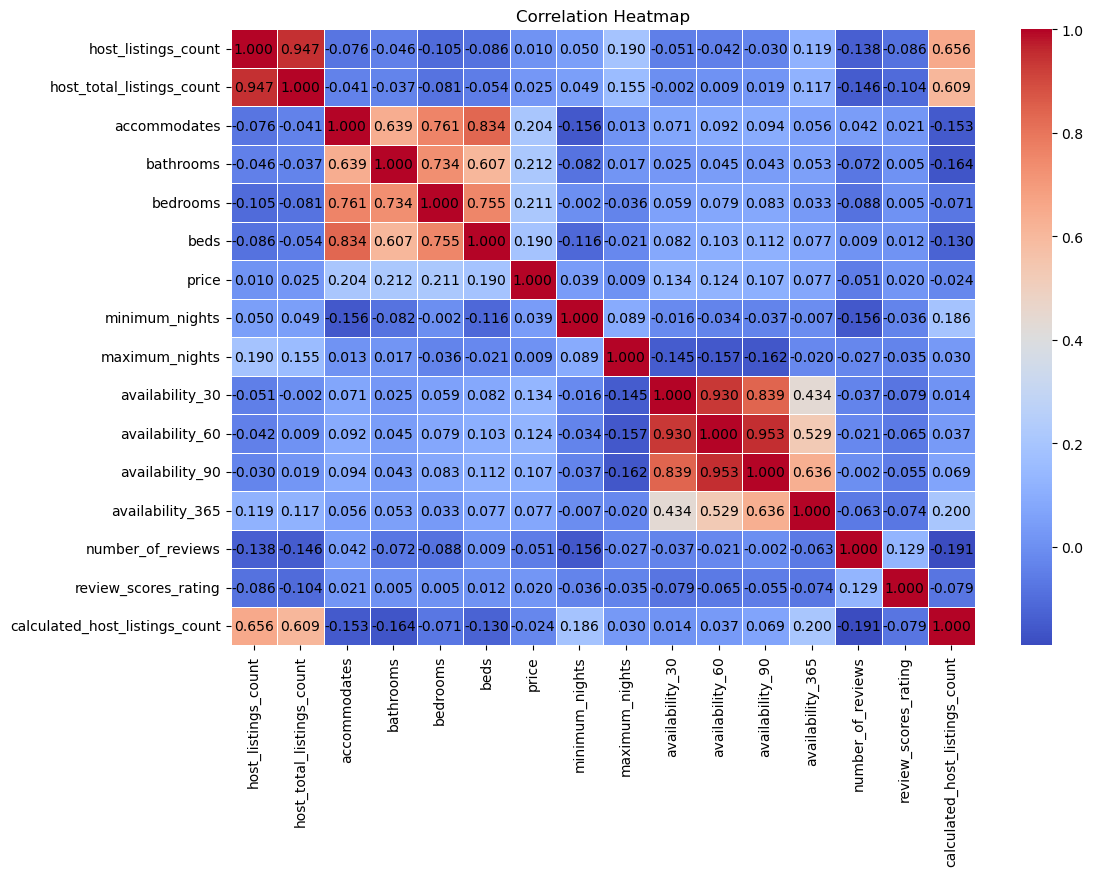

In [82]:
corr = data[['host_listings_count', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'calculated_host_listings_count']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j + 0.5, i + 0.5, f"{corr.iloc[i, j]:.3f}",
                 ha='center', va='center', color='black', fontsize=10)

plt.title('Correlation Heatmap')
plt.show()


In [83]:
data.drop(['host_total_listings_count', 'availability_60', 'availability_30', 'bedrooms', 'beds'], axis=1, inplace=True)

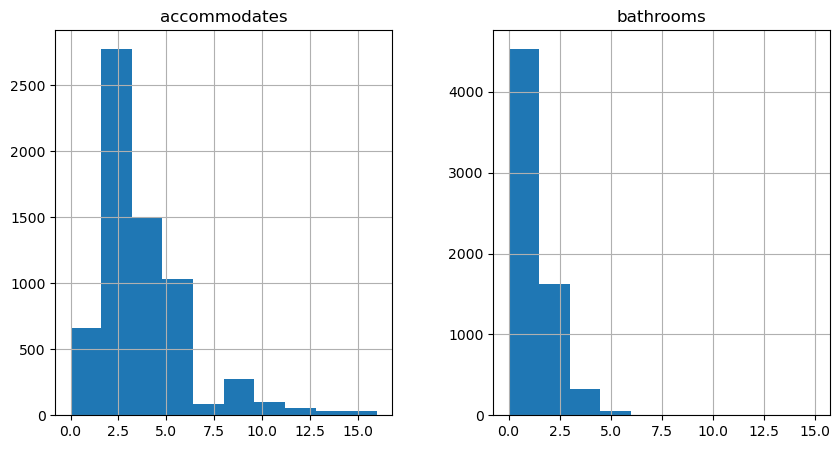

In [84]:
data[['accommodates', 'bathrooms']].hist(figsize=(10,5));

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6541 entries, 0 to 6540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6541 non-null   int64  
 1   host_listings_count             6541 non-null   int64  
 2   host_identity_verified          6541 non-null   object 
 3   property_type                   6541 non-null   object 
 4   room_type                       6541 non-null   object 
 5   accommodates                    6541 non-null   int64  
 6   bathrooms                       6536 non-null   float64
 7   amenities                       6541 non-null   object 
 8   price                           6541 non-null   float64
 9   minimum_nights                  6541 non-null   int64  
 10  maximum_nights                  6541 non-null   int64  
 11  has_availability                6541 non-null   object 
 12  availability_90                 65

In [86]:
mean_scores_rating = data['review_scores_rating'].mean()
data['review_scores_rating'].fillna(mean_scores_rating, inplace=True)


In [87]:
data.dropna(inplace=True)

In [88]:
data.shape

(6536, 18)

In [89]:
data['amenities'].value_counts()

amenities
["Hangers", "Clothing storage", "Essentials", "Coffee", "Freezer", "Elevator", "Microwave", "Hot water kettle", "Self check-in", "Long term stays allowed", "Wifi", "Ethernet connection", "Heating", "Blender", "Wine glasses", "Baking sheet", "Hot water", "Dryer", "Washer", "Iron", "Smoke alarm", "Bed linens", "Smart lock", "Kitchen", "Hair dryer", "Bathtub", "Cleaning products", "Dishes and silverware", "Outdoor furniture", "Cooking basics", "Pets allowed", "Stove", "Shampoo", "Shower gel", "Carbon monoxide alarm", "Gym", "Extra pillows and blankets", "Coffee maker", "Window guards", "Toaster", "Oven", "Conditioner", "Body soap", "Dishwasher", "Refrigerator", "Dining table", "Paid parking off premises", "Crib - available upon request", "Air conditioning", "Pool", "Exercise equipment", "TV"]                                                                                                                                                                                              

In [90]:
data.drop(['amenities'], axis=1, inplace=True)

In [91]:
data['property_type'].value_counts()

property_type
Entire rental unit                   2325
Entire home                           749
Private room in home                  530
Entire townhouse                      511
Entire condo                          446
Entire guest suite                    443
Private room in rental unit           359
Entire serviced apartment             357
Private room in townhouse             302
Room in boutique hotel                 82
Private room in condo                  72
Entire guesthouse                      67
Room in hotel                          52
Private room in bed and breakfast      45
Entire loft                            30
Shared room in townhouse               29
Private room in guest suite            21
Shared room in rental unit             16
Shared room in home                    15
Shared room in hostel                  14
Room in aparthotel                     11
Entire vacation home                   10
Private room in guesthouse              7
Room in hostel      

In [92]:
data['room_type'].value_counts()

room_type
Entire home/apt    4963
Private room       1481
Shared room          80
Hotel room           12
Name: count, dtype: int64

In [93]:
data.drop(['property_type'], axis=1, inplace=True)

<AxesSubplot: title={'center': 'Percentage of room types'}, ylabel='id'>

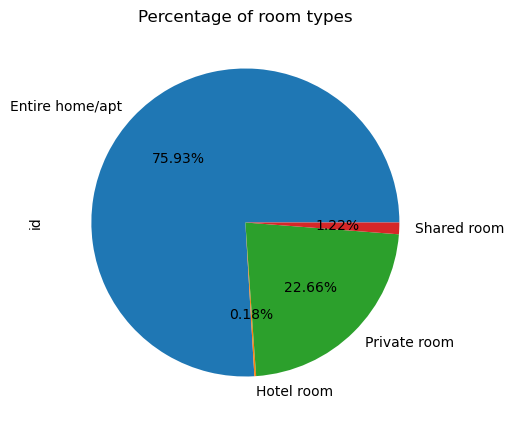

In [94]:
plt.figure(figsize=(5, 5))
data.groupby('room_type')['id'].count().plot.pie(autopct='%.2f%%', title='Percentage of room types')

<AxesSubplot: xlabel='room_type'>

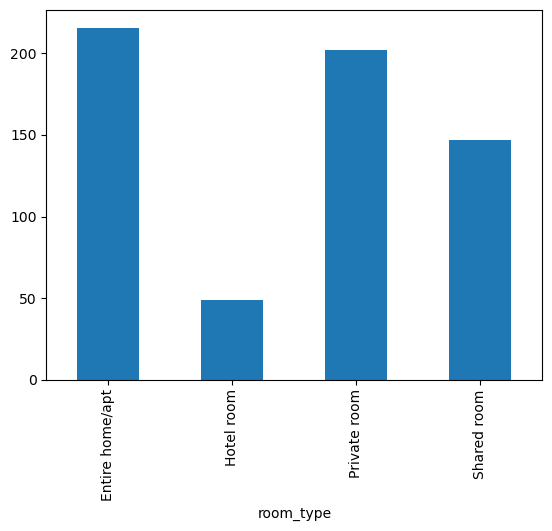

In [95]:
(data.groupby('room_type')['price'].sum() / data.groupby('room_type')['price'].count()).plot.bar()

<AxesSubplot: title={'center': 'Percentage of host identity verified'}, ylabel='id'>

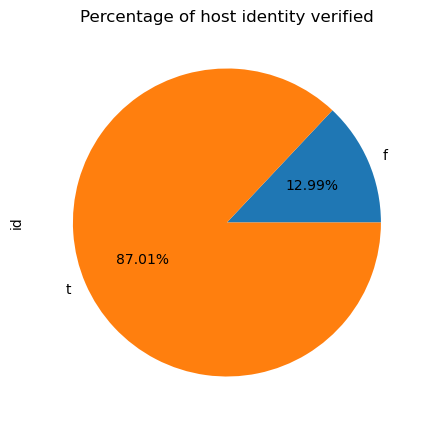

In [96]:
plt.figure(figsize=(5, 5))
data.groupby('host_identity_verified')['id'].count().plot.pie(autopct='%.2f%%', title='Percentage of host identity verified')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6536 entries, 0 to 6540
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6536 non-null   int64  
 1   host_listings_count             6536 non-null   int64  
 2   host_identity_verified          6536 non-null   object 
 3   room_type                       6536 non-null   object 
 4   accommodates                    6536 non-null   int64  
 5   bathrooms                       6536 non-null   float64
 6   price                           6536 non-null   float64
 7   minimum_nights                  6536 non-null   int64  
 8   maximum_nights                  6536 non-null   int64  
 9   has_availability                6536 non-null   object 
 10  availability_90                 6536 non-null   int64  
 11  availability_365                6536 non-null   int64  
 12  number_of_reviews               6536 no

/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

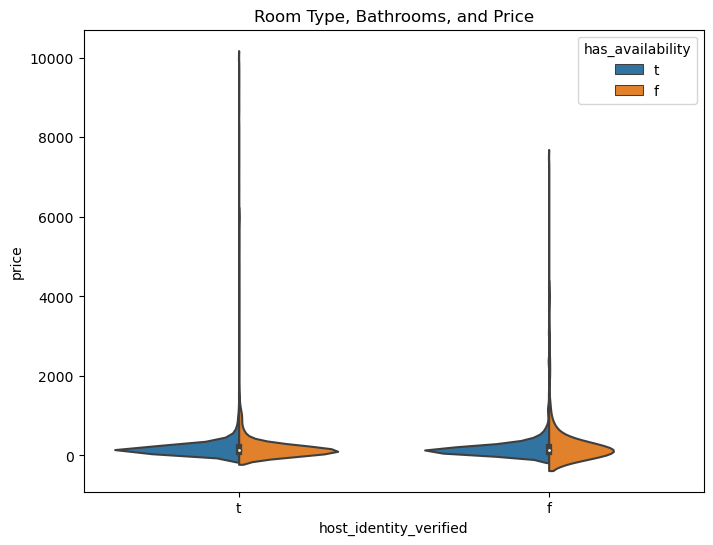

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.violinplot(data=data, x="host_identity_verified", y="price", hue="has_availability", split=True, ax=ax)
ax.set_title('Room Type, Bathrooms, and Price')

plt.show()

/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

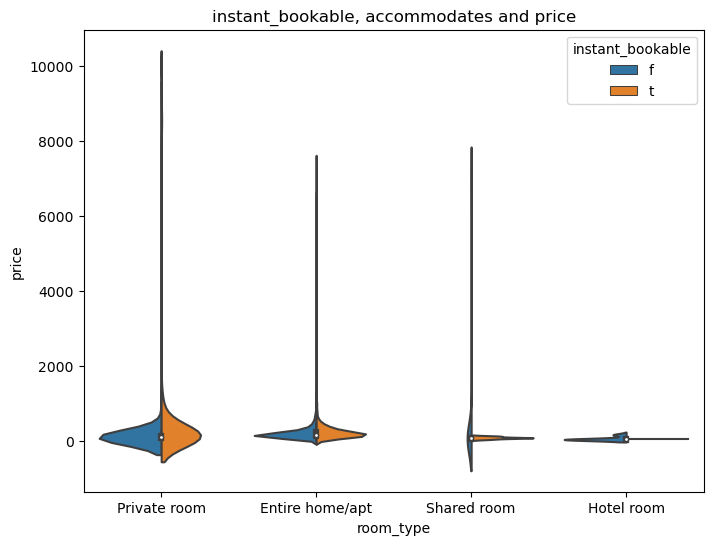

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.violinplot(data=data, x="room_type", y="price", hue="instant_bookable", split=True, ax=ax)
ax.set_title('instant_bookable, accommodates and price')
plt.show()

In [100]:
data.drop(['id'], axis=1, inplace=True)

In [101]:
data.describe()

,host_listings_count,accommodates,bathrooms,price,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count
count,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000
mean,219.959761,3.681610,1.368268,211.581701,20.293146,595.932375,39.408507,174.623623,53.683140,4.708773,27.499388
std,867.048351,2.363858,0.773418,479.514316,35.497480,486.137162,31.512224,132.991216,90.695562,0.467392,57.204764
min,1.000000,1.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1.000000,95.000000,2.000000,100.000000,5.000000,38.000000,1.000000,4.708765,1.000000
50%,3.000000,3.000000,1.000000,141.000000,4.000000,365.000000,39.000000,174.000000,15.000000,4.770000,2.000000
75%,21.500000,4.000000,1.500000,215.000000,31.000000,1125.000000,67.000000,309.000000,66.000000,4.930000,15.000000
max,4737.000000,16.000000,15.000000,10000.000000,1125.000000,10000.000000,90.000000,365.000000,917.000000,5.000000,217.000000


In [102]:
scaler = StandardScaler()
scaler.fit(data[['host_listings_count', 'accommodates', 'bathrooms',
                 'price', 'minimum_nights', 'maximum_nights', 'availability_90',
                 'availability_365', 'number_of_reviews', 'review_scores_rating','calculated_host_listings_count']])

/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


StandardScaler()

In [103]:
data.loc[:, ['host_listings_count', 'accommodates', 'bathrooms',
                 'price', 'minimum_nights', 'maximum_nights', 'availability_90',
                 'availability_365', 'number_of_reviews', 'review_scores_rating','calculated_host_listings_count']] = scaler.transform(data[['host_listings_count', 'accommodates', 'bathrooms',
                 'price', 'minimum_nights', 'maximum_nights', 'availability_90',
                 'availability_365', 'number_of_reviews', 'review_scores_rating','calculated_host_listings_count']])

/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/vb/miniconda3/envs/python_course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [104]:
data.head()

,host_listings_count,host_identity_verified,room_type,accommodates,bathrooms,price,minimum_nights,maximum_nights,has_availability,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,-0.252554,t,Private room,-1.134508,-0.476193,-0.301540,0.301646,-0.475072,t,-0.742896,0.769857,0.312243,-0.168550,f,-0.463273
1,-0.247940,t,Private room,-0.711438,-0.476193,-0.263999,-0.543549,1.088393,t,-0.203381,0.950334,4.612672,0.259388,f,-0.393343
2,-0.251401,t,Entire home/apt,1.403910,2.756458,0.297028,-0.487203,-1.143659,t,-1.187202,-1.298107,-0.206014,0.430564,f,-0.463273
3,-0.246787,t,Private room,-1.134508,0.816868,-0.339081,0.273473,1.078107,t,-0.108173,1.025532,-0.172934,-0.168550,f,-0.393343
4,-0.251401,t,Private room,-1.134508,0.170337,-0.259828,-0.374510,1.088393,t,0.177452,1.093211,-0.007533,0.280785,f,-0.445790


In [105]:
data = pd.get_dummies(data, columns=['host_identity_verified', 'room_type', 'has_availability', 'instant_bookable'])

In [106]:
data.head()

,host_listings_count,accommodates,bathrooms,price,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,review_scores_rating,...,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_f,has_availability_t,instant_bookable_f,instant_bookable_t
0,-0.252554,-1.134508,-0.476193,-0.301540,0.301646,-0.475072,-0.742896,0.769857,0.312243,-0.168550,...,False,True,False,False,True,False,False,True,True,False
1,-0.247940,-0.711438,-0.476193,-0.263999,-0.543549,1.088393,-0.203381,0.950334,4.612672,0.259388,...,False,True,False,False,True,False,False,True,True,False
2,-0.251401,1.403910,2.756458,0.297028,-0.487203,-1.143659,-1.187202,-1.298107,-0.206014,0.430564,...,False,True,True,False,False,False,False,True,True,False
3,-0.246787,-1.134508,0.816868,-0.339081,0.273473,1.078107,-0.108173,1.025532,-0.172934,-0.168550,...,False,True,False,False,True,False,False,True,True,False
4,-0.251401,-1.134508,0.170337,-0.259828,-0.374510,1.088393,0.177452,1.093211,-0.007533,0.280785,...,False,True,False,False,True,False,False,True,True,False


In [107]:
data.drop(['host_identity_verified_f', 'room_type_Shared room', 'has_availability_f', 'instant_bookable_f'], axis=1, inplace=True)

In [118]:
X = data.drop(columns=['price']).values
y = data['price'].values 

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
print(f'{X_train.shape=}, {y_train.shape=}')
print(f'{X_test.shape=}, {y_test.shape=}')

X_train.shape=(5228, 16), y_train.shape=(5228,)
X_test.shape=(1308, 16), y_test.shape=(1308,)


In [121]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
print(f'{X_train.shape=}, {y_train.shape=}')
print(f'{X_val.shape=}, {y_val.shape=}')

X_train.shape=(3921, 16), y_train.shape=(3921,)
X_val.shape=(1307, 16), y_val.shape=(1307,)


### Random Forest

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [123]:
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_val)

mae = mean_absolute_error(y_val, rf_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, rf_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, rf_pred)
print("R2 score is:", r2)

Mean Absolute Error: 0.1981136078179457
Mean Squared Error: 0.611438063156787
R2 score is: 0.48105751042872114


### LinearRegression

In [124]:
from sklearn.linear_model import LinearRegression


lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_pred = lr_regressor.predict(X_val)

mae = mean_absolute_error(y_val, lr_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, lr_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, lr_pred)
print("R2 score is:", r2)

Mean Absolute Error: 0.2422112185094121
Mean Squared Error: 1.1221142570653677
R2 score is: 0.04763409209673375


### GradientBoostingRegressor

In [125]:
from sklearn.ensemble import GradientBoostingRegressor


gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, gb_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, gb_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, gb_pred)
print("R2 score is:", r2)

Mean Absolute Error: 0.21491189041913614
Mean Squared Error: 0.5645554441317534
R2 score is: 0.520847939746881


### KNeighborsRegressor

In [126]:
from sklearn.neighbors import KNeighborsRegressor


knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
knn_pred = knn_regressor.predict(X_val)

mae = mean_absolute_error(y_val, knn_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, knn_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, knn_pred)
print("R2 score is:", r2)

Mean Absolute Error: 0.2178285499028219
Mean Squared Error: 0.9424471266234723
R2 score is: 0.2001219949339781


### XGBRegressor

In [127]:
from xgboost import XGBRegressor


xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_pred = xgb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, xgb_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, xgb_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, xgb_pred)
print("R2 score is:", r2)

Mean Absolute Error: 0.18674989688202662
Mean Squared Error: 0.46904832564363186
R2 score is: 0.6019071750586609


## Cross validation

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
mae_scores = cross_val_score(rf_regressor, X_train, y_train, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(rf_regressor, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_regressor, X_train, y_train, scoring='r2')


print("Mean MAE Score:", -mae_scores.mean())

print("Mean MSE Score:", -mse_scores.mean())

print("Mean R2 Score:", np.abs(r2_scores).mean())

Mean MAE Score: 0.19890450777047508
Mean MSE Score: 0.5659480527110159
Mean R2 Score: 0.327907778832974


In [130]:
mae_scores = cross_val_score(lr_regressor, X_train, y_train, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(lr_regressor, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lr_regressor, X_train, y_train, scoring='r2')


print("Mean MAE Score:", -mae_scores.mean())

print("Mean MSE Score:", -mse_scores.mean())

print("Mean R2 Score:", np.abs(r2_scores).mean())

Mean MAE Score: 0.2255920384775883
Mean MSE Score: 0.7235007164047784
Mean R2 Score: 0.07601939567230447


In [131]:
mae_scores = cross_val_score(gb_regressor, X_train, y_train, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(gb_regressor, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(gb_regressor, X_train, y_train, scoring='r2')


print("Mean MAE Score:", -mae_scores.mean())

print("Mean MSE Score:", -mse_scores.mean())

print("Mean R2 Score:", np.abs(r2_scores).mean())

Mean MAE Score: 0.20674992151981542
Mean MSE Score: 0.5225787218730774
Mean R2 Score: 0.3188551673891312


In [132]:
mae_scores = cross_val_score(knn_regressor, X_train, y_train, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(knn_regressor, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn_regressor, X_train, y_train, scoring='r2')


print("Mean MAE Score:", -mae_scores.mean())

print("Mean MSE Score:", -mse_scores.mean())

print("Mean R2 Score:", np.abs(r2_scores).mean())

Mean MAE Score: 0.20653027325637466
Mean MSE Score: 0.6732846527003714
Mean R2 Score: 0.12496583391209777


In [133]:
mae_scores = cross_val_score(xgb_regressor, X_train, y_train, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(xgb_regressor, X_train, y_train, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(xgb_regressor, X_train, y_train, scoring='r2')


print("Mean MAE Score:", -mae_scores.mean())

print("Mean MSE Score:", -mse_scores.mean())

print("Mean R2 Score:", np.abs(r2_scores).mean())

Mean MAE Score: 0.19405571729305462
Mean MSE Score: 0.5263606226362686
Mean R2 Score: 0.4493344649728849


## GridSearch

In [137]:
from sklearn.model_selection import GridSearchCV

In [140]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_regressor = grid_search.best_estimator_

rf_pred = best_rf_regressor.predict(X_val)

mae = mean_absolute_error(y_val, rf_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, rf_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, rf_pred)
print("R2 score is:", r2)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error: 0.1936067676183182
Mean Squared Error: 0.5270930730887923
R2 score is: 0.5526431734192933


In [141]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_gb_regressor = grid_search.best_estimator_

gb_pred = best_gb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, gb_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, gb_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, gb_pred)
print("R2 score is:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error: 0.2092253652823925
Mean Squared Error: 0.5026211300487052
R2 score is: 0.5734131120461152


In [142]:
parameters = {
    'n_neighbors': [5, 6, 8, 10, 15, 20, 50, 100]
}

grid_search = GridSearchCV(estimator=knn_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_knn_regressor = grid_search.best_estimator_

knn_pred = best_knn_regressor.predict(X_val)

mae = mean_absolute_error(y_val, knn_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, knn_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, knn_pred)
print("R2 score is:", r2)

Best Hyperparameters: {'n_neighbors': 6}
Mean Absolute Error: 0.22039999577359545
Mean Squared Error: 0.9571397933015787
R2 score is: 0.18765196814988772


In [143]:
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_xgb_regressor = grid_search.best_estimator_

xgb_pred = best_xgb_regressor.predict(X_val)

mae = mean_absolute_error(y_val, xgb_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_val, xgb_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_val, xgb_pred)
print("R2 score is:", r2)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Mean Absolute Error: 0.1983559513714752
Mean Squared Error: 0.3832263899447321
R2 score is: 0.6747463580520706


In [151]:
best_hyperparameters = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 200
}

xgb_model = XGBRegressor(
    learning_rate=best_hyperparameters['learning_rate'],
    max_depth=best_hyperparameters['max_depth'],
    n_estimators=best_hyperparameters['n_estimators']
)

In [152]:
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 score:", r2)

Mean Absolute Error: 0.23431239368859258
Mean Squared Error: 0.8416539408394286
R2 score: 0.4315516186287156
